<a href="https://colab.research.google.com/github/zSoftwareRepository/MDS556/blob/main/Baseline_Logistic_Regression_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
seed = 23

import numpy as np
np.random.seed(seed)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
features = ['ratio_open_30','prob_mix_ro_30t60','ratio_open_30t60','engaged_prob','engaged_index','avg_key_del_open','ratio_open_60','var_deliveries_last_60',
            'std_deliveries_last_90','prob_mix_ro_60t90','ratio_open_60t90','var_key_del_open','avg_deliveries_last_60','ratio_deliveries_last_60',
            'ratio_keydeliveries_last_60','ratio_deliveries_last_90','avg_deliveries_last_90','ratio_keydeliveries_last_90','avg_deliveries_last_180',
            'ratio_deliveries_last_180','std_key_del_close','ratio_keydeliveries_last_180','datediff_create_trans','datediff_month','ratio_open_90',
            'total_opens_last_90t180','app_ratio_open_90t180','app_total_opens_last_180','ratio_open_90t180','total_opens_last_180','app_total_opens_by_device',
            'age_1stperson_hushld','app_total_opens_last_90','avg_opens_by_device','std_opens_by_device','app_ratio_open_60t90','app_ratio_open_90',
            'app_ratio_open_60','app_total_opens_last_60','app_avg_opens_last_90','app_avg_opens_last_60','app_std_opens_last_60','app_ratio_open_30t60',
            'app_std_opens_last_30','app_avg_opens_last_30','app_ratio_open_30','app_total_opens_last_30','no_of_adults_hushld','home_lot_square_footage',
            'home_square_footage','vehicle_year_1st','home_loan_amount']

In [6]:
def get_dummies(data,field,prefix):
    data[field] = data[field].fillna('na')
    dms = pd.get_dummies(data.loc[:,field], prefix=prefix)
    return pd.concat([data,dms],axis=1)

In [7]:
#Mount google drive - step 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path = "drive/MyDrive/Elmhurst_Data/mydata.csv"
data = pd.read_csv(path,low_memory=False)

In [10]:
target = data[['target']]
target.columns=['target']

In [11]:
data = data.replace(np.nan, 0)

In [12]:
data = data[features + ['gender']]

In [13]:
data = get_dummies(data,'gender','gnd')

In [14]:
#data.filter(regex='^gnd',axis=1).head()

In [15]:
drop_features = ['gender']

In [16]:
data.drop(drop_features,inplace=True,axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=seed)

In [18]:
y_train = y_train.values.ravel()

In [19]:
log = LogisticRegression(penalty='l1', solver='liblinear',fit_intercept=False,max_iter=200)
regressor_logit = log.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [20]:
# make predictions for test data and evaluate
predictions = regressor_logit.predict(X_test)
predictions = np.round(predictions,0)
accuracy = accuracy_score(y_test.target, predictions)

In [21]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: %.2f%%" % (f1_score(y_test.target, predictions) * 100.0))

Accuracy: 90.96%
F1 Score: 5.73%


In [22]:
# confusion m,atrix
tn, fp, fn, tp = confusion_matrix(y_test.target, predictions).ravel()
print(tn, fp, fn, tp)

45266 116 4396 137


In [23]:
sensitivity = tp/(tp+fn)
print("True Positive Rate: %.2f%%" % (sensitivity * 100.0))
specificity = tn/(tn+fp)
print("True Negative Rate: %.2f%%" % (specificity * 100.0))

True Positive Rate: 3.02%
True Negative Rate: 99.74%


In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45382
           1       0.54      0.03      0.06      4533

    accuracy                           0.91     49915
   macro avg       0.73      0.51      0.50     49915
weighted avg       0.88      0.91      0.87     49915



In [25]:
cm = confusion_matrix(y_test, predictions)

In [26]:
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=18)

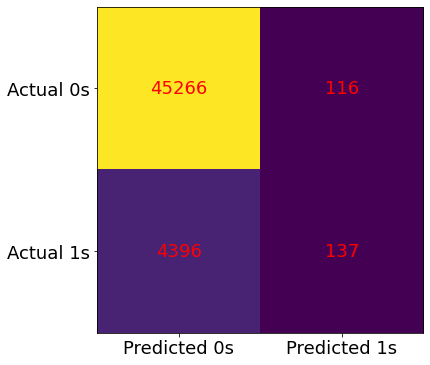

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [28]:
c1 = pd.DataFrame(data.columns.values.reshape(-1,1),columns=['features'])
c2 = pd.DataFrame(log.coef_.reshape(-1,1),columns=['coefficients'])

In [29]:
coefficients = pd.concat([c1,c2],axis=1)
coefficients['exp'] = np.exp(coefficients.coefficients)

In [30]:
coefficients.to_csv('drive/MyDrive/Elmhurst_Data/coefficients.csv',index=False)